In [419]:
import pandas
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

raw_data = pandas.read_csv('data.csv', header=0)
target = ['car','fad','mas','gla','con','adi']
n_cluster = 2

data = []
for index, row in raw_data.iterrows():
#     print(row)
    data.append([index, row['I0'], row['PA500'], row['HFS'], row['DA'], row['Area'], row['A/DA'], row['Max IP'], row['DR'], row['P'], target.index(row['Class'])])

data = np.array(data)
data_with_idx = data[:,:10]
data = data[:,1:10]
kmeans = KMeans(n_clusters=n_cluster, init='random', n_init=1000, max_iter=500)
kmeans.fit(data)
result = kmeans.labels_
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

In [409]:
grouped = {0: {}, 1: {}, 2:{}, 3:{}, 4:{}, 5:{}}
iter_data = 0
for label in result:
    grouped[label][int(data_with_idx[iter_data][0])] = data_with_idx[iter_data][1:]
    iter_data += 1

# grouped

In [418]:
def silhouette_samples(grouped_data, labels):
    sample_idx = 0
    best_neighbor = []
    sh_cof_all = []
    for y in labels:
        selected_cluster = grouped_data[y]
        n_data_in_cluster = len(selected_cluster)
        if n_data_in_cluster > 1:
            total_dist = 0
            for idx, data_cluster in selected_cluster.items():
                if idx != sample_idx:        
                    total_dist += euclidean(selected_cluster[sample_idx], data_cluster)
            avg_within_cluster =  total_dist / (n_data_in_cluster-1)

            min_avg = None
            min_avg_cluster_idx = 0
            for iter_cluster in range(n_cluster):
                if iter_cluster != y:
                    total_dist = 0
                    for _, d in grouped[iter_cluster].items():
                        total_dist += euclidean(selected_cluster[sample_idx], d)
                    avg_other_cluster = total_dist / len(grouped_data[iter_cluster])

                    if (min_avg == None):
                        min_avg = avg_other_cluster
                    else:
                        if (min_avg > avg_other_cluster):
                            min_avg = avg_other_cluster

            sh_cof = (min_avg - avg_within_cluster) / max(min_avg, avg_within_cluster)
        else:
            sh_cof = 0
        sh_cof_all.append(sh_cof)
        sample_idx += 1
    return np.array(sh_cof_all)

silhouette_samples(grouped, result)


array([ 0.15361585,  0.3474575 ,  0.12139318,  0.47662852,  0.3951913 ,
       -0.07714148,  0.7587078 ,  0.53612095,  0.57896228,  0.1964744 ,
        0.33265405,  0.54732469,  0.5871149 ,  0.25201499,  0.57099803,
        0.49593432,  0.4226224 ,  0.28924647,  0.37510285,  0.4311826 ,
        0.33344844,  0.86623098,  0.85657874,  0.74479507,  0.78678622,
        0.87736441,  0.87481825,  0.85793129,  0.87262035,  0.79363597,
        0.84972969,  0.69889518,  0.87411078,  0.81402646,  0.87262813,
        0.851619  ,  0.87124287,  0.87715368,  0.69989844,  0.87216574,
        0.87066168,  0.8744334 ,  0.74885643,  0.87296165,  0.86757319,
        0.85758967,  0.82916297,  0.71879415,  0.87603494,  0.72690441,
        0.12003574,  0.75093408,  0.49357902,  0.57778718,  0.09509976,
        0.87089925,  0.85640987,  0.85494029,  0.86835447,  0.87694521,
        0.87694521,  0.87627779,  0.87226528,  0.87684869,  0.85910174,
        0.80489551,  0.85549228,  0.85350741,  0.84989413,  0.84

In [411]:
max(4,2)

4

In [412]:
from sklearn.metrics import silhouette_score, silhouette_samples

r = silhouette_samples(data, result)
# print(sum(r)/106)
r

array([ 0.15361585,  0.3474575 ,  0.12139318,  0.47662852,  0.3951913 ,
       -0.07714148,  0.7587078 ,  0.53612095,  0.57896228,  0.1964744 ,
        0.33265405,  0.54732469,  0.5871149 ,  0.25201499,  0.57099803,
        0.49593432,  0.4226224 ,  0.28924647,  0.37510285,  0.4311826 ,
        0.33344844,  0.86623098,  0.85657874,  0.74479507,  0.78678622,
        0.87736441,  0.87481825,  0.85793129,  0.87262035,  0.79363597,
        0.84972969,  0.69889518,  0.87411078,  0.81402646,  0.87262813,
        0.851619  ,  0.87124287,  0.87715368,  0.69989844,  0.87216574,
        0.87066168,  0.8744334 ,  0.74885643,  0.87296165,  0.86757319,
        0.85758967,  0.82916297,  0.71879415,  0.87603494,  0.72690441,
        0.12003574,  0.75093408,  0.49357902,  0.57778718,  0.09509976,
        0.87089925,  0.85640987,  0.85494029,  0.86835447,  0.87694521,
        0.87694521,  0.87627779,  0.87226528,  0.87684869,  0.85910174,
        0.80489551,  0.85549228,  0.85350741,  0.84989413,  0.84

In [413]:
silhouette_score(data, result)

0.6112349986040322

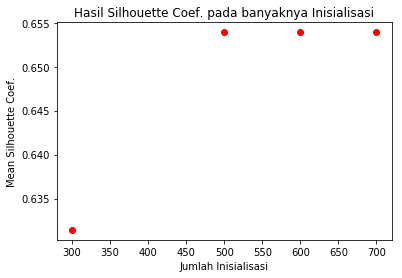

In [9]:
import matplotlib.pyplot as plt

x = [300, 500, 600, 700]
y = [0.6314341068251257, 0.6539141534438931, 0.6539141534438931, 0.6539141534438931]
plt.title('Hasil Silhouette Coef. pada banyaknya Inisialisasi')
plt.xlabel('Jumlah Inisialisasi')
plt.ylabel('Mean Silhouette Coef.')
plt.plot(x, y, 'ro')
plt.show()

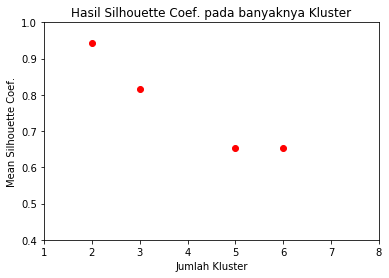

In [11]:
x = [2, 3, 5, 6]
y = [0.9416982114103424, 0.8151549251309177, 0.6519576079537003, 0.6539141534438931]
plt.axis([1, 8, 0.4, 1])
plt.title('Hasil Silhouette Coef. pada banyaknya Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Mean Silhouette Coef.')
plt.plot(x, y, 'ro')
plt.show()